# <center><font color="green">Pubg game predection</font></center>

<center><img src="https://media2.giphy.com/media/vVwv7I87uB9gZ7avim/200w.webp"></center>

###  Table of content
1.[importing library](#import)          
2.[reading of dataset](#dataset)   
3.[Cleaning of dataset](#cleaning)   
4.[Genralisation of dataset](#genral)  
5.[EDA](#eda)  
6.[Feature Engenerring](#feat)  
7.[Ml model](#nope)   


# importing libraries<a class="anchor" id="import">

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# for visualization
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,6)
import seaborn as sns
# for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import catboost as cb

# <font color="green">Reading dataset</font><a class="anchor" id="dataset">

In [2]:
data=pd.read_csv("/Users/abhijeetkashyap/Desktop/PUBG_Game_Prediction_data.csv")

In [3]:
data.shape

(4446966, 29)

In [4]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


#  DATA cleaning<a class="anchor" id="cleaning">

In [7]:
data[data["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
df=data.drop(index=2744604,axis=0)

In [9]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


###
1. id->always different (created at instance)
2. match-id-> may be same
3. group-id(for wining group)->may be same

In [10]:
df["Id"].nunique() # they are unique

4446965

In [11]:
df["matchId"].nunique() # there are total 47964 matches in dataset

47964

In [12]:
df["groupId"].nunique()# there are multiple players in one groups 

2026744

In [13]:
df.shape

(4446965, 29)

In [14]:
# number of player in one match
udf=df.groupby('matchId').count()

In [15]:
udf["groupId"].nunique()

97

In [16]:
udf.head()# group ids are same 

,Id,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchId,,,,,,,,,,,,,,,,,,,,,
0000a43bce5eec,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
0000eb01ea6cdd,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
0002912fe5ed71,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
0003b92987589e,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
0006eb8c17708d,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93


In [17]:
df["playerjoined"]=df.groupby("matchId")["matchId"].transform("count")# no.of player in match

In [18]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [19]:
# how many player in particular wining group
df["player_in_group"]=df.groupby("groupId")["groupId"].transform("count")

In [20]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,player_in_group
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.00,0,0,244.80,1,1466,0.4444,96,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,11.04,0,0,1434.00,5,0,0.6400,91,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.00,0,0,161.80,2,0,0.7755,98,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.00,0,0,202.70,3,0,0.1667,91,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.00,0,0,49.75,2,0,0.1875,97,1


# <font color="red">Genralising the dataset</font><a class="anchor" id="genral">

<font color="green">kill without moving</font>

In [21]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'player_in_group'],
      dtype='object')

In [22]:
df["distance"]=df["swimDistance"]+df["walkDistance"]+df["rideDistance"]
df["kill_without_moving"]=((df["distance"]==0)&(df["kills"]>0))

In [23]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,player_in_group,distance,kill_without_moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,4,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,4,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,2,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,1,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,1,49.7500,False


In [24]:
df[df["kill_without_moving"]==True].index

Int64Index([   1824,    6673,   11892,   14631,   15591,   20881,   23298,
              24640,   25659,   30079,
            ...
            4426500, 4429697, 4432954, 4436511, 4437516, 4440232, 4440898,
            4440927, 4441511, 4446682],
           dtype='int64', length=1535)

In [25]:
df.drop(df[df["kill_without_moving"]==True].index,axis=0,inplace=True)

In [26]:
df[df["kill_without_moving"]==True].index

Int64Index([], dtype='int64')

In [27]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,player_in_group,distance,kill_without_moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,4,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,4,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,2,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,1,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,1,49.7500,False


<AxesSubplot:xlabel='headshotKills', ylabel='Count'>

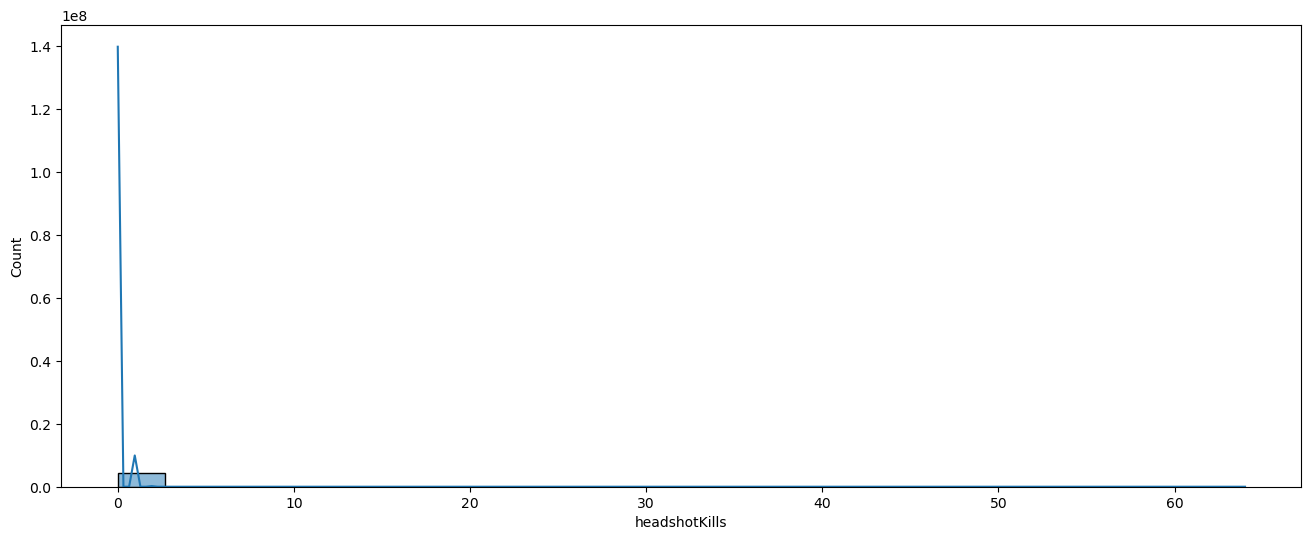

In [28]:
# we need a unbaised data for genral people
sns.histplot(data=df,x="headshotKills",kde=True)
# max(head_shot=6/7)for genral player

In [29]:
df[df["headshotKills"]>7].index

Int64Index([   2569,   24027,   26725,   37505,   38348,   45530,   48965,
              49933,   63225,   66266,
            ...
            4402045, 4405122, 4406453, 4408299, 4415712, 4421783, 4422538,
            4428741, 4429968, 4431589],
           dtype='int64', length=992)

In [30]:
df.drop(df[df["headshotKills"]>7].index,axis=0,inplace=True)

In [31]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'player_in_group', 'distance', 'kill_without_moving'],
      dtype='object')

<AxesSubplot:xlabel='roadKills', ylabel='count'>

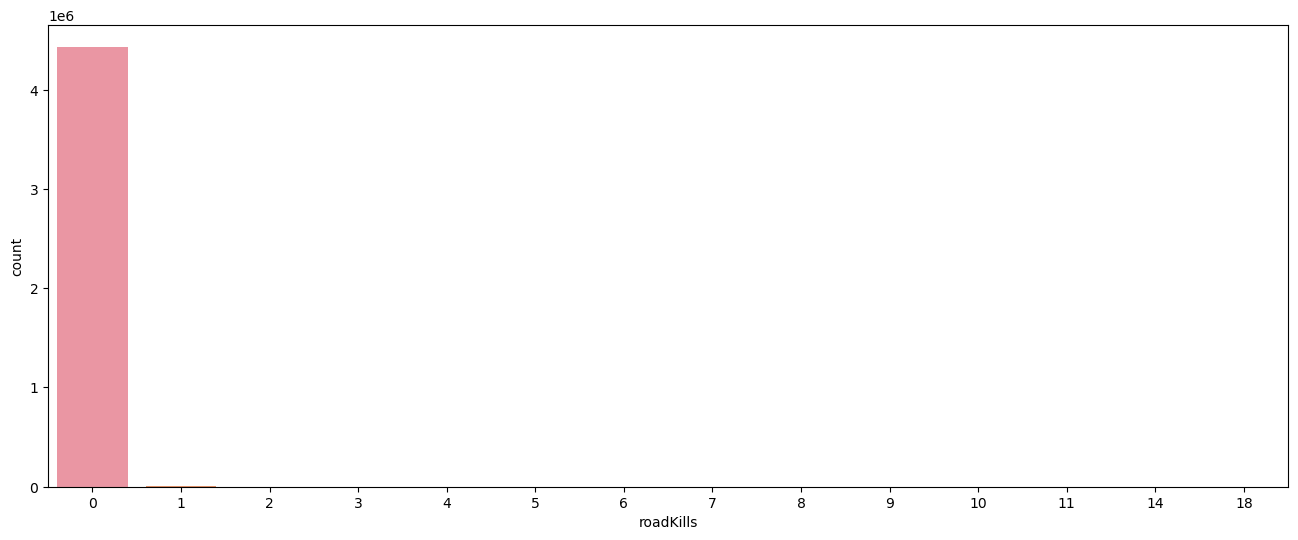

In [32]:
sns.countplot(x="roadKills",data=df)

In [33]:
df.drop(df[df["roadKills"]>6].index,axis=0,inplace=True)

<AxesSubplot:xlabel='weaponsAcquired', ylabel='Count'>

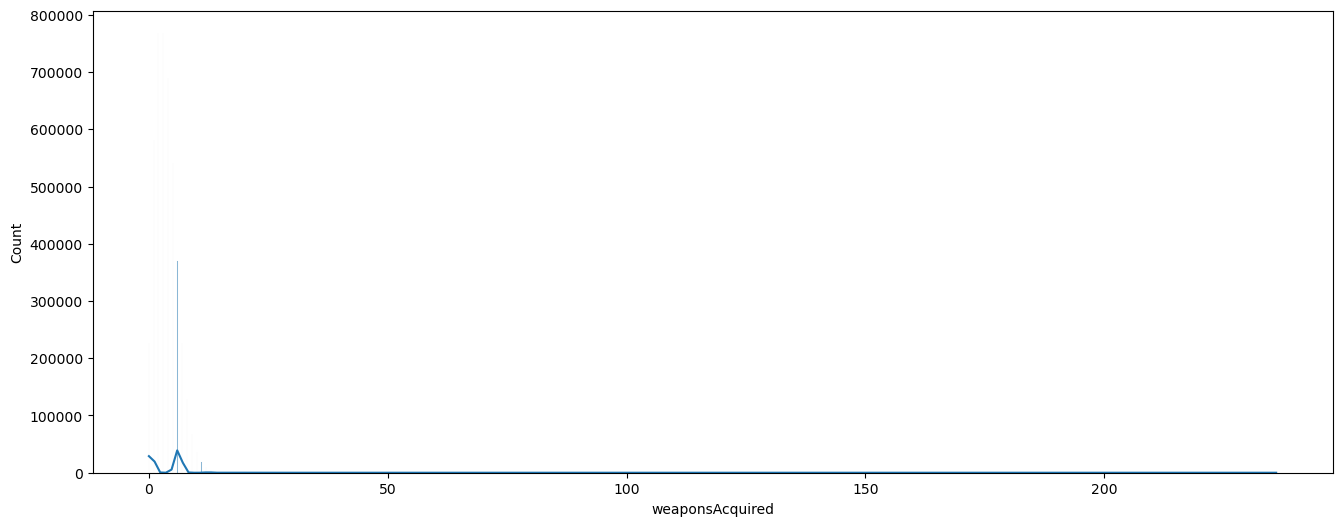

In [34]:
sns.histplot(x="weaponsAcquired",data=df,kde=True) #>15 is very rare

In [35]:
df.drop(df[df["weaponsAcquired"]>20].index,axis=0,inplace=True)

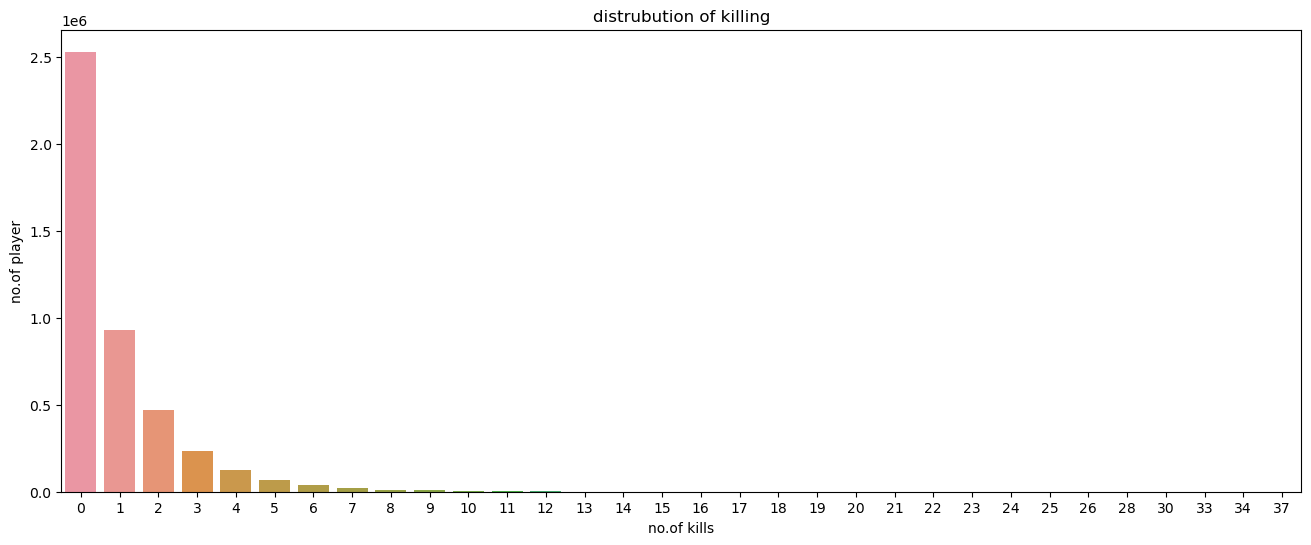

In [36]:
sns.countplot(data=df,x="kills").set_title("distrubution of killing")
plt.ylabel("no.of player")
plt.xlabel("no.of kills")
plt.show()

In [37]:
df.shape

(4441746, 33)

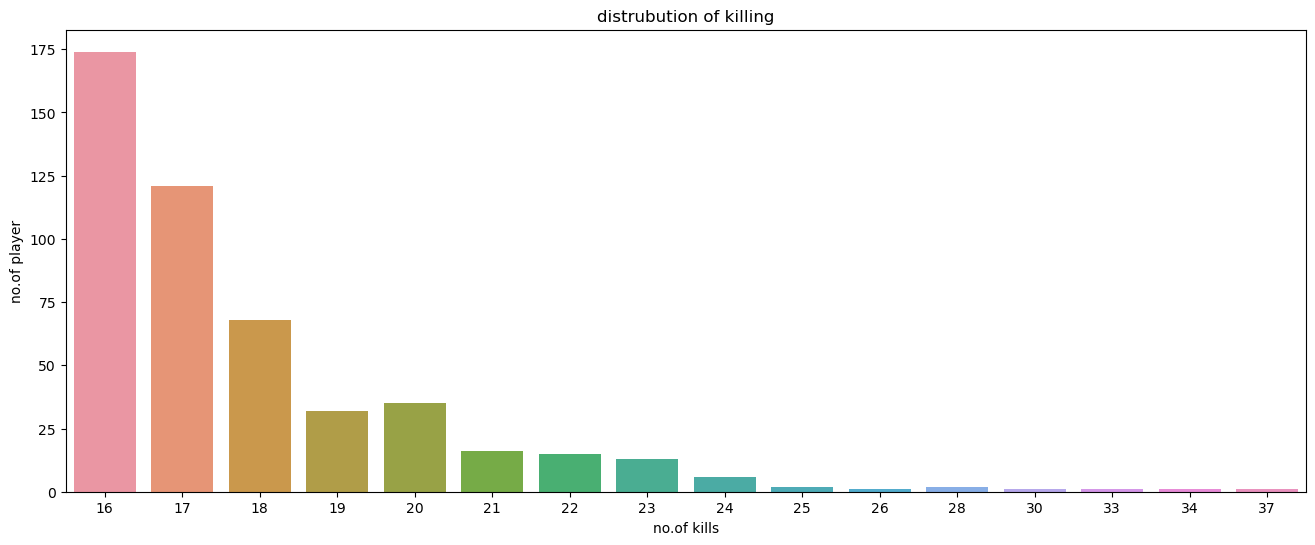

In [38]:
sns.countplot(data=df[df["kills"]>15],x="kills").set_title("distrubution of killing")
plt.ylabel("no.of player")
plt.xlabel("no.of kills")
plt.show()

In [39]:
df.drop(df[df["kills"]>20].index,axis=0,inplace=True)

In [40]:
df.shape

(4441687, 33)

In [41]:
df["headshot_rate"]=df["headshotKills"]/df["kills"]
df["headshot_rate"]=df["headshot_rate"].fillna(0)

<AxesSubplot:ylabel='Density'>

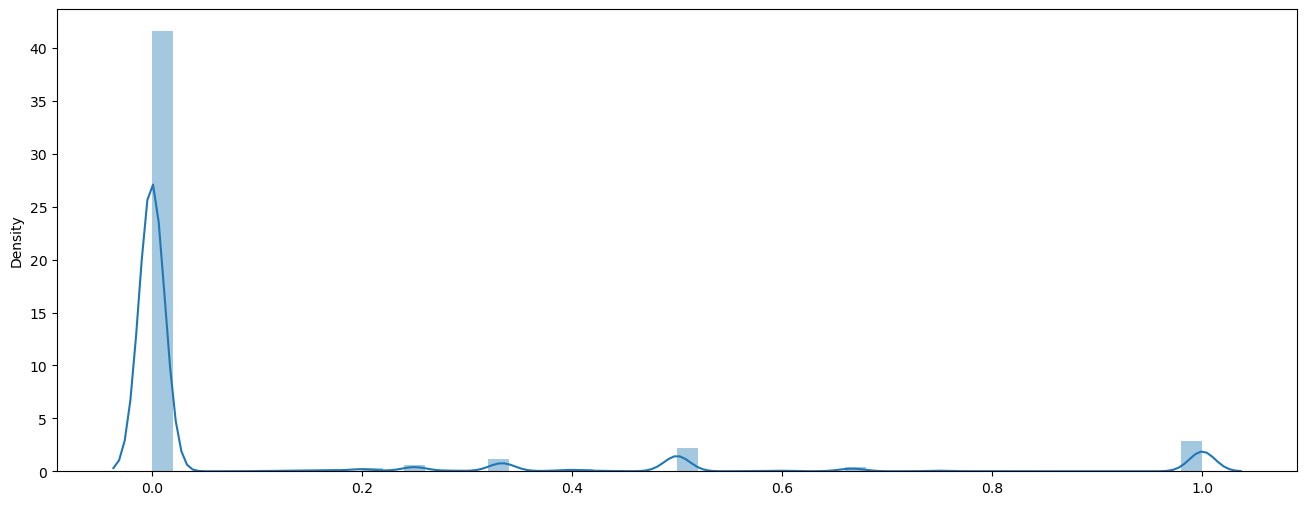

In [42]:
sns.distplot(x=df["headshot_rate"])

In [43]:
df.drop(df[(df["headshot_rate"]==1)&(df["kills"]>5)].index,axis=0,inplace=True)

In [44]:
df.shape

(4441565, 34)

Text(0.5, 1.0, 'distance of shoooting')

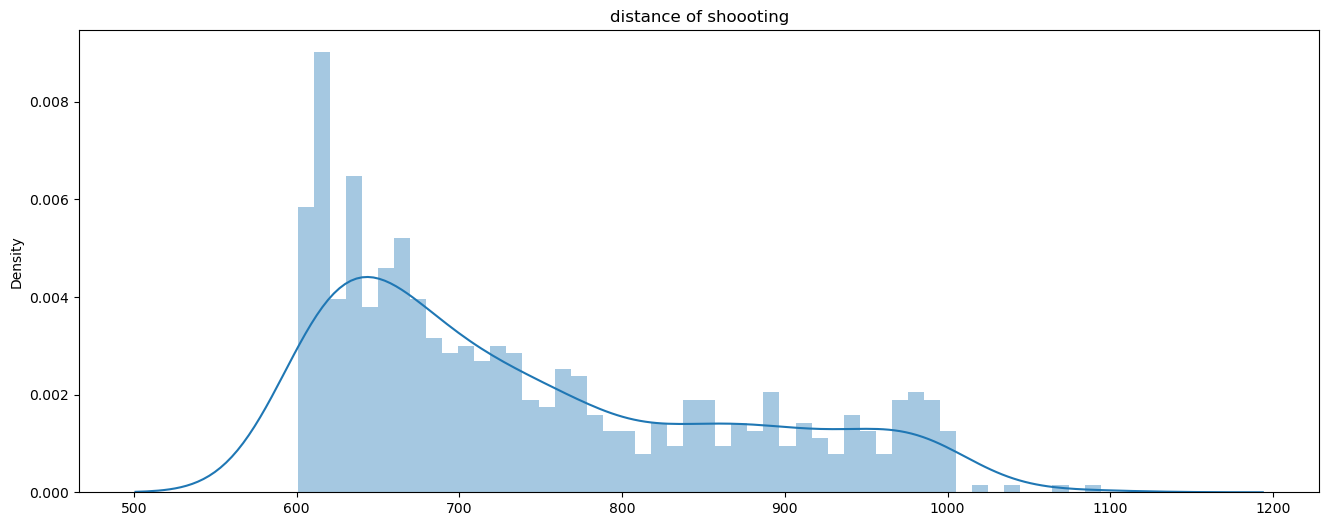

In [45]:
sns.distplot(x=df[df["longestKill"]>600]["longestKill"],bins=50).set_title("distance of shoooting")

In [46]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'player_in_group', 'distance', 'kill_without_moving', 'headshot_rate'],
      dtype='object')

In [47]:
df.drop(df[df["longestKill"]>1000].index,axis=0,inplace=True)

In [48]:
df.shape

(4441559, 34)

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

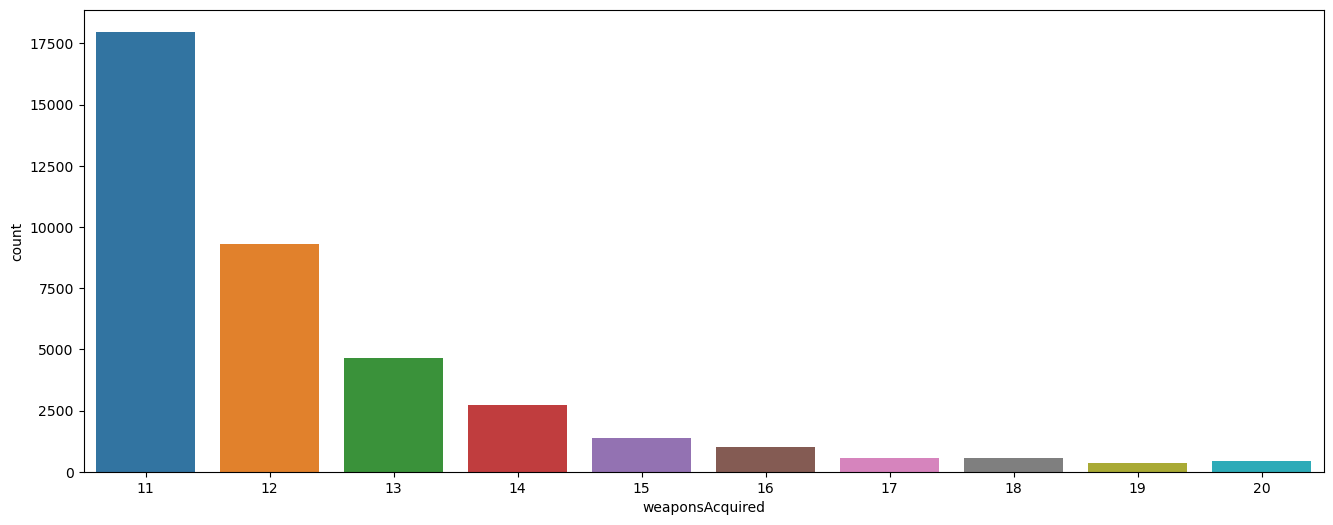

In [49]:
sns.countplot(x=df[df["weaponsAcquired"]>10]["weaponsAcquired"])

In [50]:
df.drop(df[df["weaponsAcquired"]>18].index,axis=0,inplace=True)

In [51]:
df.shape

(4440772, 34)

<AxesSubplot:xlabel='killStreaks', ylabel='count'>

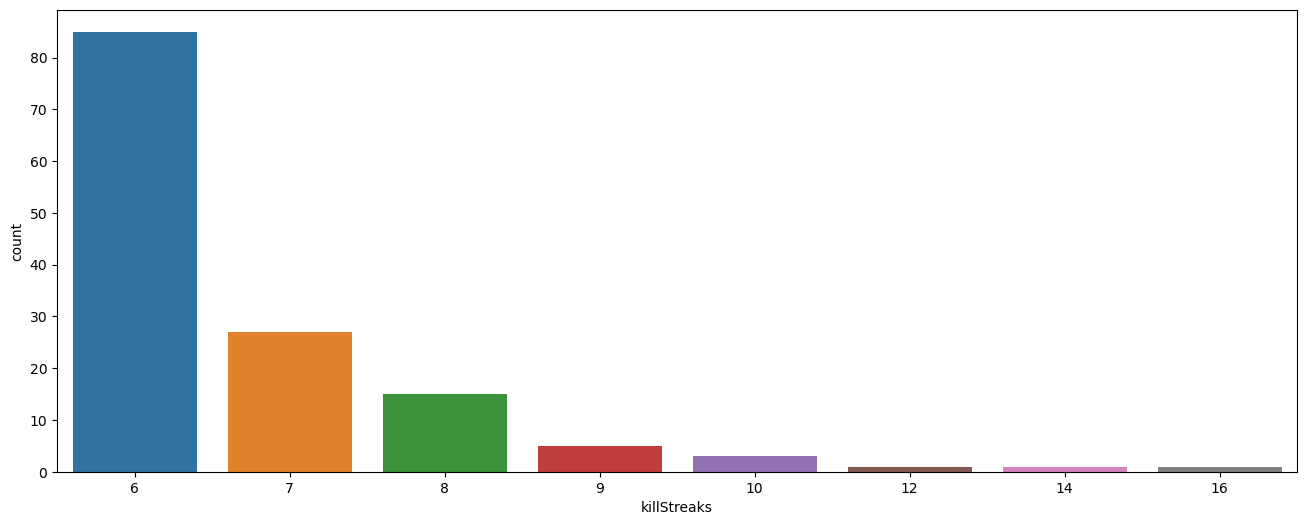

In [52]:
sns.countplot(x=df[df["killStreaks"]>5]["killStreaks"])

In [53]:
df.drop(df[df["killStreaks"]>5]["killStreaks"].index,axis=0,inplace=True)

In [54]:
df.shape

(4440634, 34)

<AxesSubplot:xlabel='revives', ylabel='count'>

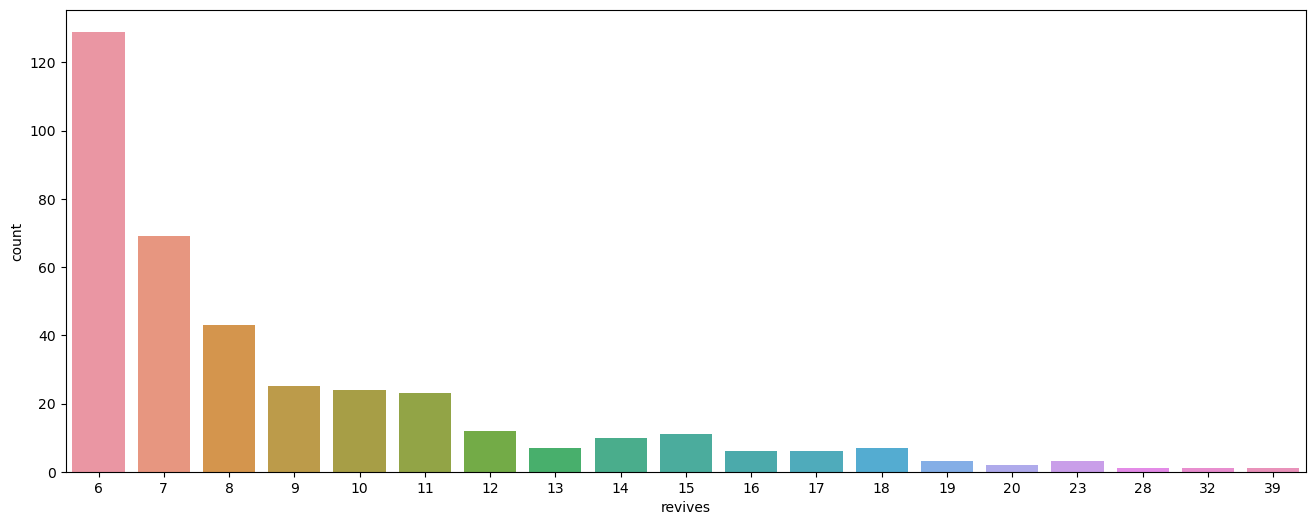

In [55]:
sns.countplot(x=df[df["revives"]>5]["revives"])

In [56]:
df[df["revives"]>7].index

Int64Index([  18328,   57773,   58692,  115647,  128444,  156030,  157009,
             174318,  175497,  186636,
            ...
            4201556, 4240544, 4249437, 4293836, 4302537, 4330274, 4366657,
            4381188, 4415416, 4439718],
           dtype='int64', length=185)

In [57]:
df.drop(df[df["revives"]>7].index,axis=0,inplace=True)

<AxesSubplot:xlabel='assists', ylabel='count'>

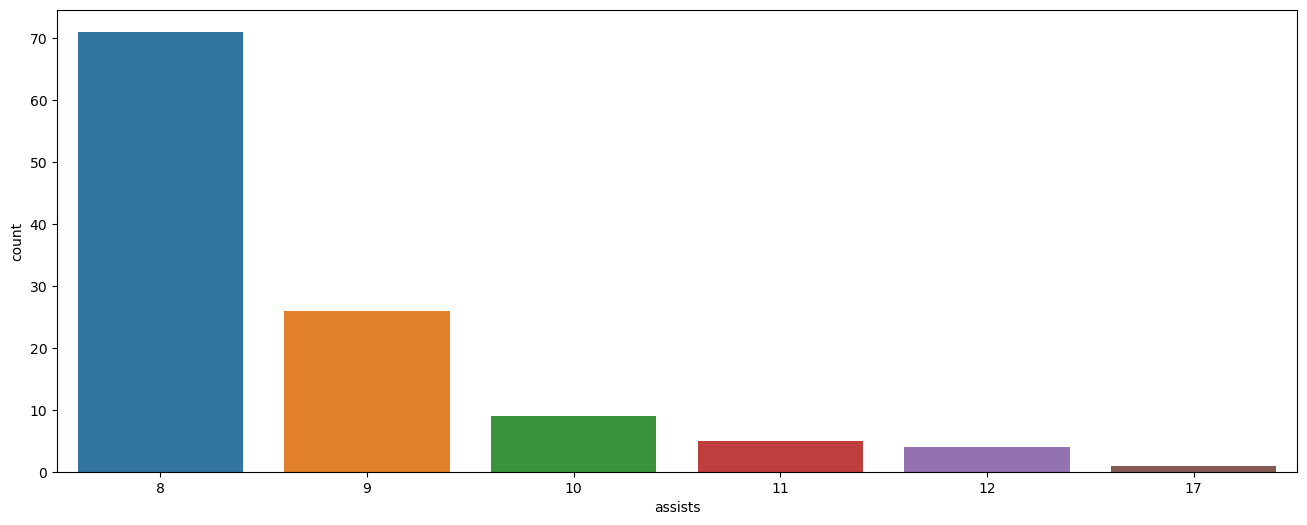

In [58]:
sns.countplot(x=df[df["assists"]>7]["assists"])

In [59]:
df.drop(df[df["assists"]>8].index,axis=0,inplace=True)

In [60]:
df[df["assists"]>8].index

Int64Index([], dtype='int64')

<AxesSubplot:xlabel='teamKills', ylabel='count'>

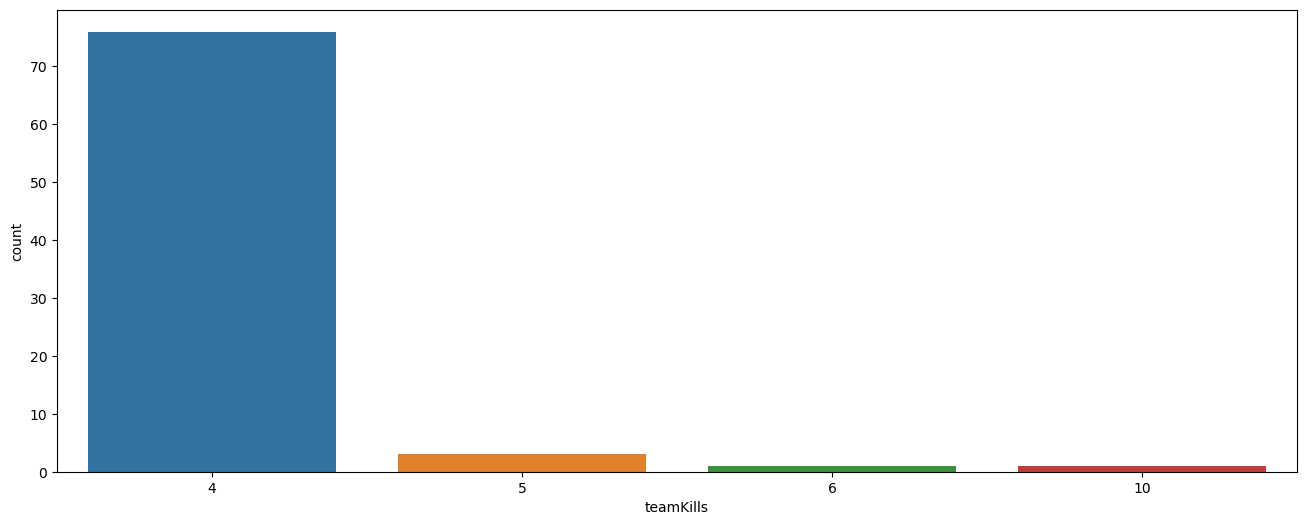

In [61]:
sns.countplot(x=df[df["teamKills"]>3]["teamKills"])

In [62]:
df.drop(df[df["teamKills"]>3].index,axis=0,inplace=True)

<AxesSubplot:xlabel='vehicleDestroys', ylabel='count'>

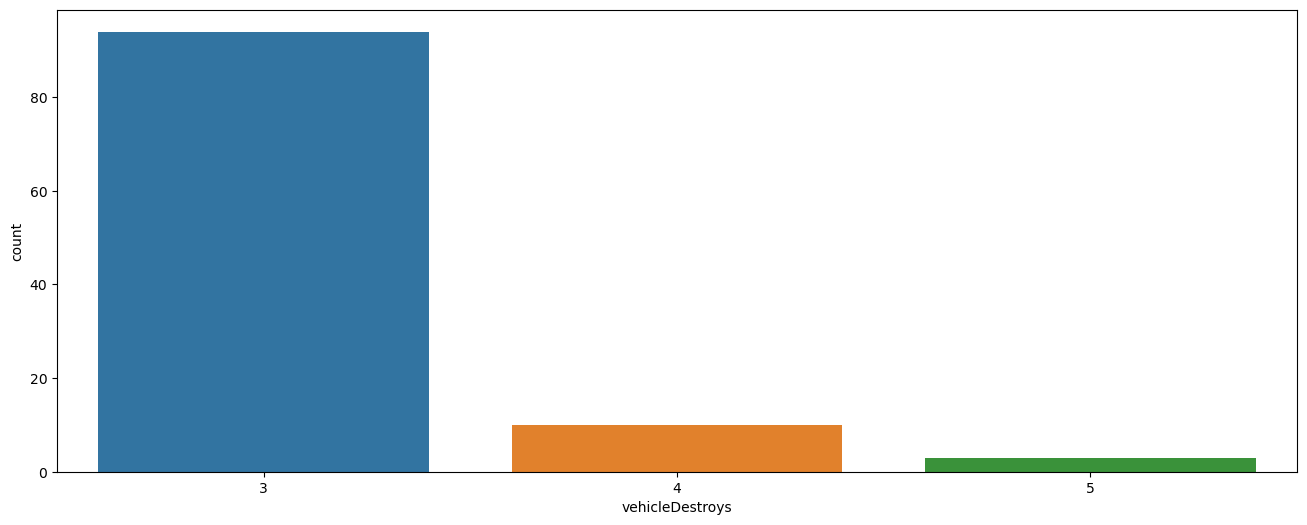

In [63]:
sns.countplot(x=df[df["vehicleDestroys"]>2]["vehicleDestroys"])

In [64]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'player_in_group', 'distance', 'kill_without_moving', 'headshot_rate'],
      dtype='object')

In [65]:
df["maxPlace"]

0          28
1          26
2          50
3          31
4          97
           ..
4446961    29
4446962    93
4446963    28
4446964    26
4446965    98
Name: maxPlace, Length: 4440323, dtype: int64

# <font color="green">feature engenerring</font><a class="anchor" id="feat">

### 
normalising factor

If there are 2 kills in 100 player(percentile is not good)

if there are 2 kills in 4 player(percentile is good even they have same no of killing)

In [66]:
normalising_factor=(100-df["playerjoined"]/100)+1
df["kill_normalisation"]=df["kills"]*normalising_factor
df["damageDealt_norm"]=df["damageDealt"]*normalising_factor
df["matchDuration_norm"]=df["matchDuration"]*normalising_factor

In [67]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'player_in_group', 'distance', 'kill_without_moving', 'headshot_rate',
       'kill_normalisation', 'damageDealt_norm', 'matchDuration_norm'],
      dtype='object')

In [68]:
df.drop(columns=["Id","groupId","matchId","damageDealt","matchDuration","kills","headshotKills",
                "rideDistance","swimDistance"],axis=1,inplace=True)

In [69]:
df.columns

Index(['assists', 'boosts', 'DBNOs', 'heals', 'killPlace', 'killPoints',
       'killStreaks', 'longestKill', 'matchType', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc',
       'playerjoined', 'player_in_group', 'distance', 'kill_without_moving',
       'headshot_rate', 'kill_normalisation', 'damageDealt_norm',
       'matchDuration_norm'],
      dtype='object')

# EDA<a class="anchor" id="eda">

<AxesSubplot:>

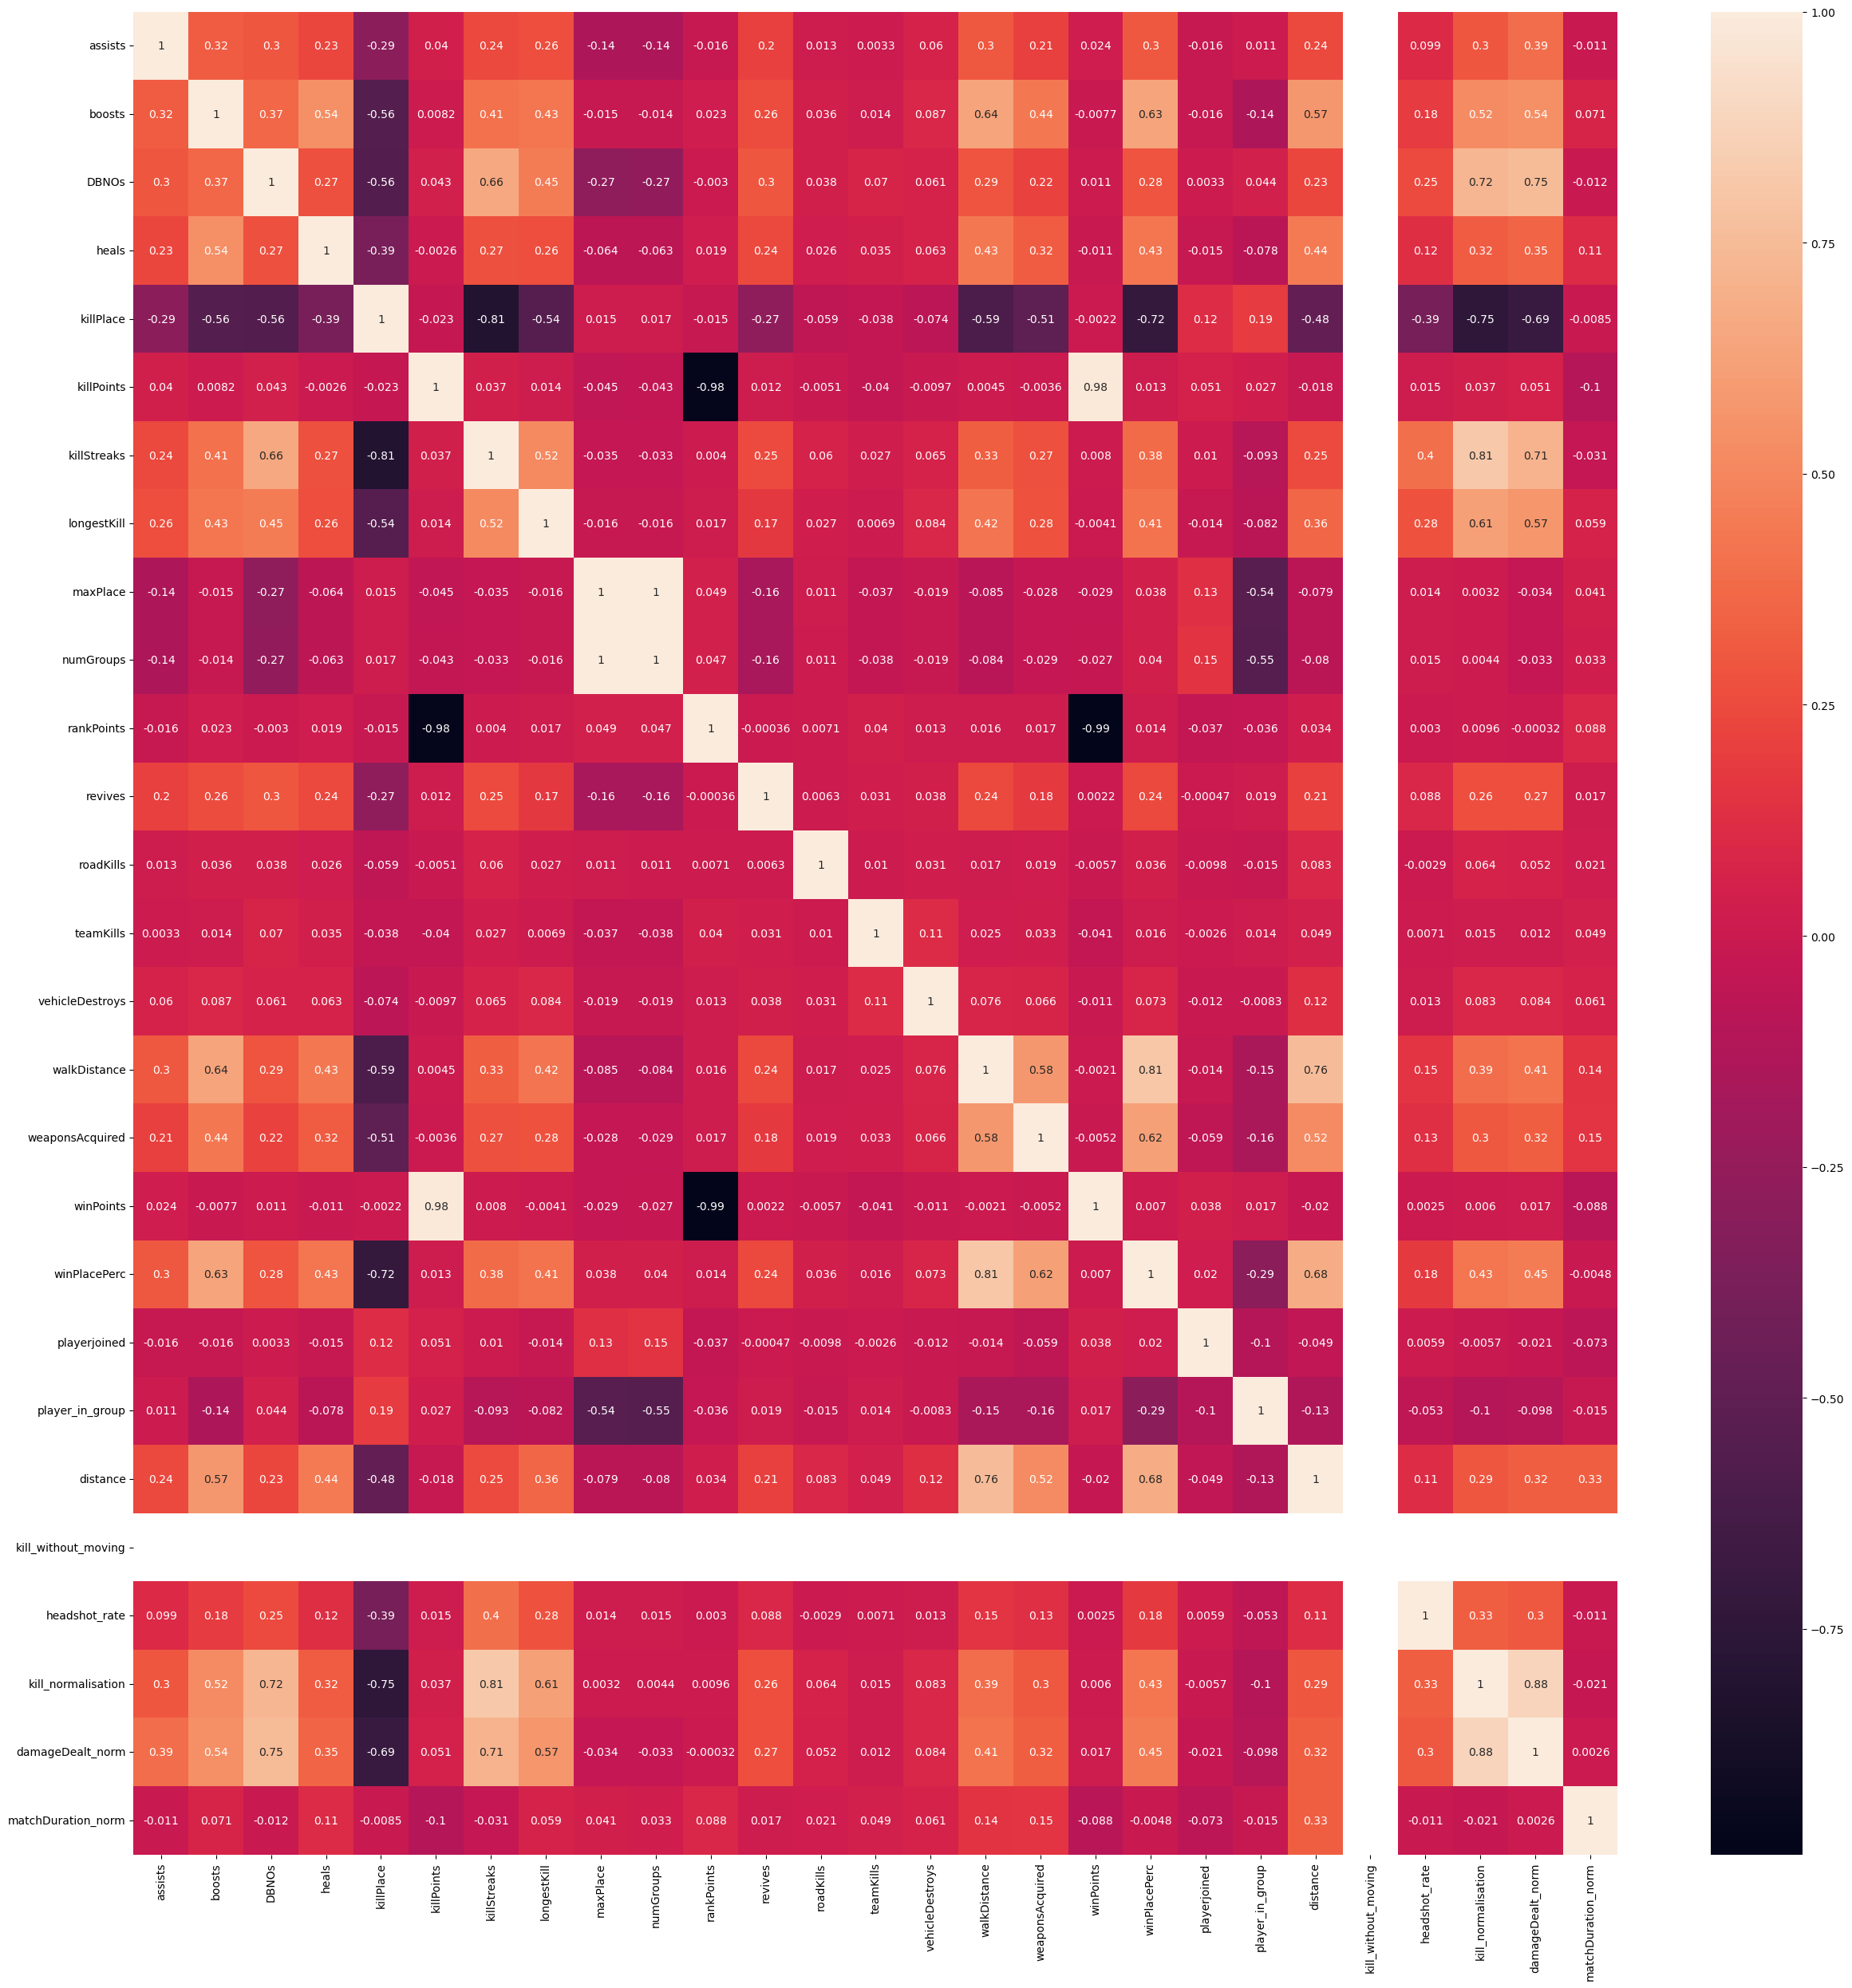

In [70]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)


# Cat boost model<a class="anchor" id="nope">

In [71]:
df.columns

Index(['assists', 'boosts', 'DBNOs', 'heals', 'killPlace', 'killPoints',
       'killStreaks', 'longestKill', 'matchType', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc',
       'playerjoined', 'player_in_group', 'distance', 'kill_without_moving',
       'headshot_rate', 'kill_normalisation', 'damageDealt_norm',
       'matchDuration_norm'],
      dtype='object')

In [72]:
x_input=df.drop(["winPlacePerc"],axis=1)
y_output=df["winPlacePerc"]

In [73]:
x_input.head()

,assists,boosts,DBNOs,heals,killPlace,killPoints,killStreaks,longestKill,matchType,maxPlace,...,weaponsAcquired,winPoints,playerjoined,player_in_group,distance,kill_without_moving,headshot_rate,kill_normalisation,damageDealt_norm,matchDuration_norm
0,0,0,0,0,60,1241,0,0.00,squad-fpp,28,...,1,1466,96,4,244.8000,False,0.0,0.00,0.0000,130652.24
1,0,0,0,0,57,0,0,0.00,squad-fpp,26,...,5,0,91,4,1445.0445,False,0.0,0.00,9155.2323,177859.93
2,1,0,0,0,47,0,0,0.00,duo,50,...,2,0,98,2,161.8000,False,0.0,0.00,6801.3600,131826.36
3,0,0,0,0,75,0,0,0.00,squad-fpp,31,...,3,0,91,1,202.7000,False,0.0,0.00,3292.9610,143729.24
4,0,0,0,0,45,0,1,58.53,solo-fpp,97,...,2,0,97,1,49.7500,False,0.0,100.03,10003.0000,142442.72


In [74]:
x_input=pd.get_dummies(x_input,columns=["matchType","kill_without_moving"])

In [75]:
x_input.head()

,assists,boosts,DBNOs,heals,killPlace,killPoints,killStreaks,longestKill,maxPlace,numGroups,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,kill_without_moving_False
0,0,0,0,0,60,1241,0,0.00,28,26,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,57,0,0,0.00,26,25,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,47,0,0,0.00,50,47,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,75,0,0,0.00,31,30,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,45,0,1,58.53,97,95,...,0,0,0,0,0,0,1,0,0,1


In [76]:
features=x_input.columns

In [77]:
sc=StandardScaler()
x_input=sc.fit_transform(x_input)
x_input=pd.DataFrame(x_input)

In [78]:
x_input.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.401214,-0.645476,-0.583833,-0.511051,0.450120,1.172674,-0.766529,-0.452177,-0.694515,-0.732236,...,-0.03384,-0.006022,-0.014411,-0.008917,-0.056338,-0.206541,-0.370701,-0.405128,1.236544,0.0
1,-0.401214,-0.645476,-0.583833,-0.511051,0.340838,-0.804697,-0.766529,-0.452177,-0.778503,-0.775203,...,-0.03384,-0.006022,-0.014411,-0.008917,-0.056338,-0.206541,-0.370701,-0.405128,1.236544,0.0
2,1.337870,-0.645476,-0.583833,-0.511051,-0.023438,-0.804697,-0.766529,-0.452177,0.229361,0.170067,...,-0.03384,-0.006022,-0.014411,-0.008917,-0.056338,-0.206541,-0.370701,-0.405128,-0.808705,0.0
3,-0.401214,-0.645476,-0.583833,-0.511051,0.996533,-0.804697,-0.766529,-0.452177,-0.568532,-0.560369,...,-0.03384,-0.006022,-0.014411,-0.008917,-0.056338,-0.206541,-0.370701,-0.405128,1.236544,0.0
4,-0.401214,-0.645476,-0.583833,-0.511051,-0.096293,-0.804697,0.648260,0.705130,2.203095,2.232473,...,-0.03384,-0.006022,-0.014411,-0.008917,-0.056338,-0.206541,2.697595,-0.405128,-0.808705,0.0


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_input,y_output,test_size=0.3,random_state=43,shuffle=True)

In [80]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3108226, 42) (3108226,)
(1332097, 42) (1332097,)


In [81]:
train_dataset=cb.Pool(x_train,y_train)
test_dataset=cb.Pool(x_test,y_test)

In [82]:
model=cb.CatBoostRegressor(loss_function="RMSE")

In [83]:
grid={"iterations":[100,150],
     "learning_rate":[0.03,0.1],
     "depth":[2,4,6,8]}

In [84]:
model.grid_search(grid,train_dataset)

0:	learn: 0.5483839	test: 0.5478380	best: 0.5478380 (0)	total: 290ms	remaining: 28.7s
1:	learn: 0.5334809	test: 0.5329487	best: 0.5329487 (1)	total: 432ms	remaining: 21.2s
2:	learn: 0.5190984	test: 0.5185764	best: 0.5185764 (2)	total: 581ms	remaining: 18.8s
3:	learn: 0.5051638	test: 0.5046539	best: 0.5046539 (3)	total: 727ms	remaining: 17.4s
4:	learn: 0.4916855	test: 0.4911862	best: 0.4911862 (4)	total: 970ms	remaining: 18.4s
5:	learn: 0.4786184	test: 0.4781302	best: 0.4781302 (5)	total: 1.14s	remaining: 17.8s
6:	learn: 0.4659626	test: 0.4654863	best: 0.4654863 (6)	total: 1.28s	remaining: 17.1s
7:	learn: 0.4536849	test: 0.4532232	best: 0.4532232 (7)	total: 1.43s	remaining: 16.4s
8:	learn: 0.4418449	test: 0.4413977	best: 0.4413977 (8)	total: 1.56s	remaining: 15.8s
9:	learn: 0.4303857	test: 0.4299461	best: 0.4299461 (9)	total: 1.68s	remaining: 15.2s
10:	learn: 0.4193119	test: 0.4188792	best: 0.4188792 (10)	total: 1.81s	remaining: 14.6s
11:	learn: 0.4085684	test: 0.4081454	best: 0.4081454

95:	learn: 0.1331411	test: 0.1331372	best: 0.1331372 (95)	total: 12.5s	remaining: 521ms
96:	learn: 0.1327378	test: 0.1327336	best: 0.1327336 (96)	total: 12.6s	remaining: 391ms
97:	learn: 0.1323522	test: 0.1323495	best: 0.1323495 (97)	total: 12.8s	remaining: 260ms
98:	learn: 0.1319863	test: 0.1319839	best: 0.1319839 (98)	total: 12.9s	remaining: 130ms
99:	learn: 0.1316182	test: 0.1316192	best: 0.1316192 (99)	total: 13s	remaining: 0us

bestTest = 0.1316192347
bestIteration = 99

0:	loss: 0.1316192	best: 0.1316192 (0)	total: 15.1s	remaining: 3m 45s
0:	learn: 0.5126779	test: 0.5121596	best: 0.5121596 (0)	total: 159ms	remaining: 15.7s
1:	learn: 0.4670948	test: 0.4666181	best: 0.4666181 (1)	total: 263ms	remaining: 12.9s
2:	learn: 0.4262696	test: 0.4258395	best: 0.4258395 (2)	total: 397ms	remaining: 12.8s
3:	learn: 0.3899563	test: 0.3895503	best: 0.3895503 (3)	total: 615ms	remaining: 14.8s
4:	learn: 0.3574297	test: 0.3570628	best: 0.3570628 (4)	total: 772ms	remaining: 14.7s
5:	learn: 0.3285586

90:	learn: 0.1117540	test: 0.1118697	best: 0.1118697 (90)	total: 13.7s	remaining: 1.35s
91:	learn: 0.1116686	test: 0.1117861	best: 0.1117861 (91)	total: 13.8s	remaining: 1.2s
92:	learn: 0.1115439	test: 0.1116594	best: 0.1116594 (92)	total: 14s	remaining: 1.05s
93:	learn: 0.1114641	test: 0.1115817	best: 0.1115817 (93)	total: 14.2s	remaining: 906ms
94:	learn: 0.1111315	test: 0.1112457	best: 0.1112457 (94)	total: 14.3s	remaining: 754ms
95:	learn: 0.1110445	test: 0.1111628	best: 0.1111628 (95)	total: 14.5s	remaining: 604ms
96:	learn: 0.1109598	test: 0.1110771	best: 0.1110771 (96)	total: 14.6s	remaining: 453ms
97:	learn: 0.1108836	test: 0.1110005	best: 0.1110005 (97)	total: 14.8s	remaining: 302ms
98:	learn: 0.1108040	test: 0.1109230	best: 0.1109230 (98)	total: 15s	remaining: 152ms
99:	learn: 0.1107064	test: 0.1108241	best: 0.1108241 (99)	total: 15.2s	remaining: 0us

bestTest = 0.110824114
bestIteration = 99

1:	loss: 0.1108241	best: 0.1108241 (1)	total: 30.5s	remaining: 3m 33s
0:	learn: 0.5

84:	learn: 0.1387476	test: 0.1387270	best: 0.1387270 (84)	total: 12.1s	remaining: 9.23s
85:	learn: 0.1381431	test: 0.1381232	best: 0.1381232 (85)	total: 12.2s	remaining: 9.07s
86:	learn: 0.1375647	test: 0.1375487	best: 0.1375487 (86)	total: 12.3s	remaining: 8.91s
87:	learn: 0.1369929	test: 0.1369781	best: 0.1369781 (87)	total: 12.4s	remaining: 8.76s
88:	learn: 0.1364344	test: 0.1364217	best: 0.1364217 (88)	total: 12.6s	remaining: 8.61s
89:	learn: 0.1359358	test: 0.1359229	best: 0.1359229 (89)	total: 12.7s	remaining: 8.46s
90:	learn: 0.1354396	test: 0.1354302	best: 0.1354302 (90)	total: 12.8s	remaining: 8.31s
91:	learn: 0.1349522	test: 0.1349440	best: 0.1349440 (91)	total: 12.9s	remaining: 8.15s
92:	learn: 0.1344908	test: 0.1344854	best: 0.1344854 (92)	total: 13.1s	remaining: 8s
93:	learn: 0.1340324	test: 0.1340268	best: 0.1340268 (93)	total: 13.2s	remaining: 7.85s
94:	learn: 0.1335450	test: 0.1335409	best: 0.1335409 (94)	total: 13.3s	remaining: 7.7s
95:	learn: 0.1331411	test: 0.1331372

26:	learn: 0.1343266	test: 0.1343316	best: 0.1343316 (26)	total: 3.56s	remaining: 16.2s
27:	learn: 0.1326740	test: 0.1326833	best: 0.1326833 (27)	total: 3.68s	remaining: 16s
28:	learn: 0.1313178	test: 0.1313339	best: 0.1313339 (28)	total: 3.8s	remaining: 15.9s
29:	learn: 0.1301760	test: 0.1301920	best: 0.1301920 (29)	total: 3.92s	remaining: 15.7s
30:	learn: 0.1291273	test: 0.1291511	best: 0.1291511 (30)	total: 4.05s	remaining: 15.5s
31:	learn: 0.1281996	test: 0.1282270	best: 0.1282270 (31)	total: 4.17s	remaining: 15.4s
32:	learn: 0.1273578	test: 0.1273947	best: 0.1273947 (32)	total: 4.29s	remaining: 15.2s
33:	learn: 0.1266117	test: 0.1266427	best: 0.1266427 (33)	total: 4.4s	remaining: 15s
34:	learn: 0.1259585	test: 0.1259876	best: 0.1259876 (34)	total: 4.52s	remaining: 14.9s
35:	learn: 0.1252778	test: 0.1253131	best: 0.1253131 (35)	total: 4.64s	remaining: 14.7s
36:	learn: 0.1247076	test: 0.1247421	best: 0.1247421 (36)	total: 4.76s	remaining: 14.5s
37:	learn: 0.1241039	test: 0.1241381	b

120:	learn: 0.1080392	test: 0.1081500	best: 0.1081500 (120)	total: 14.9s	remaining: 3.56s
121:	learn: 0.1079720	test: 0.1080856	best: 0.1080856 (121)	total: 15s	remaining: 3.44s
122:	learn: 0.1078696	test: 0.1079816	best: 0.1079816 (122)	total: 15.1s	remaining: 3.31s
123:	learn: 0.1078097	test: 0.1079230	best: 0.1079230 (123)	total: 15.2s	remaining: 3.19s
124:	learn: 0.1077031	test: 0.1078116	best: 0.1078116 (124)	total: 15.3s	remaining: 3.07s
125:	learn: 0.1076534	test: 0.1077625	best: 0.1077625 (125)	total: 15.5s	remaining: 2.95s
126:	learn: 0.1075596	test: 0.1076677	best: 0.1076677 (126)	total: 15.6s	remaining: 2.82s
127:	learn: 0.1074962	test: 0.1076050	best: 0.1076050 (127)	total: 15.7s	remaining: 2.7s
128:	learn: 0.1073154	test: 0.1074201	best: 0.1074201 (128)	total: 15.8s	remaining: 2.58s
129:	learn: 0.1072458	test: 0.1073497	best: 0.1073497 (129)	total: 16s	remaining: 2.45s
130:	learn: 0.1071495	test: 0.1072551	best: 0.1072551 (130)	total: 16.1s	remaining: 2.33s
131:	learn: 0.1

63:	learn: 0.1442602	test: 0.1441684	best: 0.1441684 (63)	total: 11.1s	remaining: 6.25s
64:	learn: 0.1427536	test: 0.1426653	best: 0.1426653 (64)	total: 11.3s	remaining: 6.07s
65:	learn: 0.1412991	test: 0.1412176	best: 0.1412176 (65)	total: 11.4s	remaining: 5.9s
66:	learn: 0.1397474	test: 0.1396637	best: 0.1396637 (66)	total: 11.6s	remaining: 5.73s
67:	learn: 0.1384245	test: 0.1383444	best: 0.1383444 (67)	total: 11.8s	remaining: 5.55s
68:	learn: 0.1371716	test: 0.1370939	best: 0.1370939 (68)	total: 12s	remaining: 5.37s
69:	learn: 0.1359707	test: 0.1358948	best: 0.1358948 (69)	total: 12.1s	remaining: 5.19s
70:	learn: 0.1347754	test: 0.1347008	best: 0.1347008 (70)	total: 12.3s	remaining: 5.01s
71:	learn: 0.1336466	test: 0.1335739	best: 0.1335739 (71)	total: 12.4s	remaining: 4.84s
72:	learn: 0.1325230	test: 0.1324508	best: 0.1324508 (72)	total: 12.6s	remaining: 4.66s
73:	learn: 0.1315241	test: 0.1314528	best: 0.1314528 (73)	total: 12.8s	remaining: 4.49s
74:	learn: 0.1303755	test: 0.130303

57:	learn: 0.1003298	test: 0.1003717	best: 0.1003717 (57)	total: 11s	remaining: 7.96s
58:	learn: 0.1001732	test: 0.1002132	best: 0.1002132 (58)	total: 11.1s	remaining: 7.73s
59:	learn: 0.1000105	test: 0.1000513	best: 0.1000513 (59)	total: 11.3s	remaining: 7.51s
60:	learn: 0.0998340	test: 0.0998750	best: 0.0998750 (60)	total: 11.4s	remaining: 7.3s
61:	learn: 0.0993420	test: 0.0993811	best: 0.0993811 (61)	total: 11.6s	remaining: 7.11s
62:	learn: 0.0991157	test: 0.0991559	best: 0.0991559 (62)	total: 11.8s	remaining: 6.9s
63:	learn: 0.0985847	test: 0.0986195	best: 0.0986195 (63)	total: 11.9s	remaining: 6.71s
64:	learn: 0.0984392	test: 0.0984743	best: 0.0984743 (64)	total: 12.1s	remaining: 6.5s
65:	learn: 0.0980308	test: 0.0980634	best: 0.0980634 (65)	total: 12.3s	remaining: 6.31s
66:	learn: 0.0979130	test: 0.0979473	best: 0.0979473 (66)	total: 12.4s	remaining: 6.1s
67:	learn: 0.0974487	test: 0.0974855	best: 0.0974855 (67)	total: 12.5s	remaining: 5.91s
68:	learn: 0.0971746	test: 0.0972169	b

51:	learn: 0.1687902	test: 0.1686626	best: 0.1686626 (51)	total: 9.59s	remaining: 18.1s
52:	learn: 0.1662898	test: 0.1661664	best: 0.1661664 (52)	total: 9.77s	remaining: 17.9s
53:	learn: 0.1638761	test: 0.1637561	best: 0.1637561 (53)	total: 9.95s	remaining: 17.7s
54:	learn: 0.1615734	test: 0.1614587	best: 0.1614587 (54)	total: 10.1s	remaining: 17.5s
55:	learn: 0.1593220	test: 0.1592101	best: 0.1592101 (55)	total: 10.3s	remaining: 17.3s
56:	learn: 0.1572010	test: 0.1570934	best: 0.1570934 (56)	total: 10.4s	remaining: 17s
57:	learn: 0.1551554	test: 0.1550524	best: 0.1550524 (57)	total: 10.6s	remaining: 16.8s
58:	learn: 0.1530347	test: 0.1529305	best: 0.1529305 (58)	total: 10.8s	remaining: 16.7s
59:	learn: 0.1510615	test: 0.1509582	best: 0.1509582 (59)	total: 11s	remaining: 16.5s
60:	learn: 0.1492679	test: 0.1491682	best: 0.1491682 (60)	total: 11.1s	remaining: 16.3s
61:	learn: 0.1475383	test: 0.1474420	best: 0.1474420 (61)	total: 11.3s	remaining: 16s
62:	learn: 0.1458621	test: 0.1457680	b

144:	learn: 0.1049581	test: 0.1049412	best: 0.1049412 (144)	total: 25.1s	remaining: 864ms
145:	learn: 0.1048607	test: 0.1048440	best: 0.1048440 (145)	total: 25.2s	remaining: 691ms
146:	learn: 0.1047193	test: 0.1047023	best: 0.1047023 (146)	total: 25.4s	remaining: 518ms
147:	learn: 0.1046106	test: 0.1045940	best: 0.1045940 (147)	total: 25.6s	remaining: 346ms
148:	learn: 0.1045169	test: 0.1045012	best: 0.1045012 (148)	total: 25.7s	remaining: 173ms
149:	learn: 0.1042910	test: 0.1042771	best: 0.1042771 (149)	total: 25.9s	remaining: 0us

bestTest = 0.1042771062
bestIteration = 149

6:	loss: 0.1042771	best: 0.0916153 (5)	total: 2m 12s	remaining: 2m 49s
0:	learn: 0.5113832	test: 0.5108818	best: 0.5108818 (0)	total: 153ms	remaining: 22.9s
1:	learn: 0.4645109	test: 0.4640622	best: 0.4640622 (1)	total: 276ms	remaining: 20.4s
2:	learn: 0.4225662	test: 0.4221541	best: 0.4221541 (2)	total: 462ms	remaining: 22.6s
3:	learn: 0.3853156	test: 0.3849411	best: 0.3849411 (3)	total: 715ms	remaining: 26.1s
4

87:	learn: 0.0930293	test: 0.0930578	best: 0.0930578 (87)	total: 14.5s	remaining: 10.2s
88:	learn: 0.0929188	test: 0.0929509	best: 0.0929509 (88)	total: 14.6s	remaining: 10s
89:	learn: 0.0927710	test: 0.0928029	best: 0.0928029 (89)	total: 14.8s	remaining: 9.87s
90:	learn: 0.0926369	test: 0.0926696	best: 0.0926696 (90)	total: 15s	remaining: 9.7s
91:	learn: 0.0925726	test: 0.0926046	best: 0.0926046 (91)	total: 15.1s	remaining: 9.53s
92:	learn: 0.0924679	test: 0.0924994	best: 0.0924994 (92)	total: 15.3s	remaining: 9.37s
93:	learn: 0.0923434	test: 0.0923719	best: 0.0923719 (93)	total: 15.4s	remaining: 9.2s
94:	learn: 0.0922454	test: 0.0922739	best: 0.0922739 (94)	total: 15.6s	remaining: 9.02s
95:	learn: 0.0921290	test: 0.0921610	best: 0.0921610 (95)	total: 15.7s	remaining: 8.85s
96:	learn: 0.0920605	test: 0.0920911	best: 0.0920911 (96)	total: 15.9s	remaining: 8.68s
97:	learn: 0.0919626	test: 0.0919910	best: 0.0919910 (97)	total: 16.1s	remaining: 8.52s
98:	learn: 0.0917583	test: 0.0917859	b

29:	learn: 0.2524793	test: 0.2522203	best: 0.2522203 (29)	total: 6.96s	remaining: 16.2s
30:	learn: 0.2465676	test: 0.2463206	best: 0.2463206 (30)	total: 7.22s	remaining: 16.1s
31:	learn: 0.2408305	test: 0.2405906	best: 0.2405906 (31)	total: 7.47s	remaining: 15.9s
32:	learn: 0.2352828	test: 0.2350444	best: 0.2350444 (32)	total: 7.73s	remaining: 15.7s
33:	learn: 0.2299265	test: 0.2296914	best: 0.2296914 (33)	total: 7.96s	remaining: 15.5s
34:	learn: 0.2247586	test: 0.2245283	best: 0.2245283 (34)	total: 8.17s	remaining: 15.2s
35:	learn: 0.2197614	test: 0.2195392	best: 0.2195392 (35)	total: 8.4s	remaining: 14.9s
36:	learn: 0.2149197	test: 0.2147021	best: 0.2147021 (36)	total: 8.61s	remaining: 14.7s
37:	learn: 0.2103013	test: 0.2100918	best: 0.2100918 (37)	total: 8.83s	remaining: 14.4s
38:	learn: 0.2058511	test: 0.2056473	best: 0.2056473 (38)	total: 9.04s	remaining: 14.1s
39:	learn: 0.2015200	test: 0.2013230	best: 0.2013230 (39)	total: 9.27s	remaining: 13.9s
40:	learn: 0.1973705	test: 0.1971

22:	learn: 0.1161204	test: 0.1160417	best: 0.1160417 (22)	total: 4.89s	remaining: 16.4s
23:	learn: 0.1132666	test: 0.1131879	best: 0.1131879 (23)	total: 5.1s	remaining: 16.2s
24:	learn: 0.1109727	test: 0.1109077	best: 0.1109077 (24)	total: 5.28s	remaining: 15.8s
25:	learn: 0.1089127	test: 0.1088544	best: 0.1088544 (25)	total: 5.47s	remaining: 15.6s
26:	learn: 0.1072622	test: 0.1072060	best: 0.1072060 (26)	total: 5.66s	remaining: 15.3s
27:	learn: 0.1056365	test: 0.1055791	best: 0.1055791 (27)	total: 5.85s	remaining: 15.1s
28:	learn: 0.1043761	test: 0.1043184	best: 0.1043184 (28)	total: 6.04s	remaining: 14.8s
29:	learn: 0.1031012	test: 0.1030483	best: 0.1030483 (29)	total: 6.21s	remaining: 14.5s
30:	learn: 0.1019963	test: 0.1019476	best: 0.1019476 (30)	total: 6.41s	remaining: 14.3s
31:	learn: 0.1007583	test: 0.1007217	best: 0.1007217 (31)	total: 6.59s	remaining: 14s
32:	learn: 0.0999148	test: 0.0998887	best: 0.0998887 (32)	total: 6.77s	remaining: 13.7s
33:	learn: 0.0992362	test: 0.099211

15:	learn: 0.3609846	test: 0.3606198	best: 0.3606198 (15)	total: 3.52s	remaining: 29.5s
16:	learn: 0.3514819	test: 0.3511325	best: 0.3511325 (16)	total: 3.73s	remaining: 29.2s
17:	learn: 0.3422735	test: 0.3419327	best: 0.3419327 (17)	total: 3.95s	remaining: 29s
18:	learn: 0.3333181	test: 0.3329865	best: 0.3329865 (18)	total: 4.22s	remaining: 29.1s
19:	learn: 0.3246913	test: 0.3243708	best: 0.3243708 (19)	total: 4.46s	remaining: 29s
20:	learn: 0.3163527	test: 0.3160401	best: 0.3160401 (20)	total: 4.7s	remaining: 28.9s
21:	learn: 0.3082554	test: 0.3079484	best: 0.3079484 (21)	total: 4.93s	remaining: 28.7s
22:	learn: 0.3004165	test: 0.3001134	best: 0.3001134 (22)	total: 5.16s	remaining: 28.5s
23:	learn: 0.2928501	test: 0.2925536	best: 0.2925536 (23)	total: 5.37s	remaining: 28.2s
24:	learn: 0.2855336	test: 0.2852449	best: 0.2852449 (24)	total: 5.58s	remaining: 27.9s
25:	learn: 0.2784251	test: 0.2781410	best: 0.2781410 (25)	total: 5.77s	remaining: 27.5s
26:	learn: 0.2716461	test: 0.2713703	

109:	learn: 0.1007967	test: 0.1007426	best: 0.1007426 (109)	total: 23.8s	remaining: 8.66s
110:	learn: 0.1005022	test: 0.1004492	best: 0.1004492 (110)	total: 24s	remaining: 8.44s
111:	learn: 0.1002185	test: 0.1001667	best: 0.1001667 (111)	total: 24.2s	remaining: 8.22s
112:	learn: 0.0999561	test: 0.0999048	best: 0.0999048 (112)	total: 24.5s	remaining: 8.01s
113:	learn: 0.0996128	test: 0.0995632	best: 0.0995632 (113)	total: 24.7s	remaining: 7.8s
114:	learn: 0.0993727	test: 0.0993227	best: 0.0993227 (114)	total: 24.9s	remaining: 7.59s
115:	learn: 0.0991703	test: 0.0991214	best: 0.0991214 (115)	total: 25.1s	remaining: 7.37s
116:	learn: 0.0988716	test: 0.0988261	best: 0.0988261 (116)	total: 25.3s	remaining: 7.15s
117:	learn: 0.0986813	test: 0.0986365	best: 0.0986365 (117)	total: 25.5s	remaining: 6.92s
118:	learn: 0.0984026	test: 0.0983580	best: 0.0983580 (118)	total: 25.7s	remaining: 6.7s
119:	learn: 0.0981785	test: 0.0981347	best: 0.0981347 (119)	total: 26s	remaining: 6.49s
120:	learn: 0.09

52:	learn: 0.0906052	test: 0.0906056	best: 0.0906056 (52)	total: 10.7s	remaining: 19.6s
53:	learn: 0.0904457	test: 0.0904482	best: 0.0904482 (53)	total: 10.9s	remaining: 19.4s
54:	learn: 0.0901736	test: 0.0901767	best: 0.0901767 (54)	total: 11.1s	remaining: 19.1s
55:	learn: 0.0899095	test: 0.0899157	best: 0.0899157 (55)	total: 11.3s	remaining: 18.9s
56:	learn: 0.0897749	test: 0.0897794	best: 0.0897794 (56)	total: 11.4s	remaining: 18.7s
57:	learn: 0.0895528	test: 0.0895568	best: 0.0895568 (57)	total: 11.6s	remaining: 18.4s
58:	learn: 0.0893590	test: 0.0893657	best: 0.0893657 (58)	total: 11.8s	remaining: 18.2s
59:	learn: 0.0891046	test: 0.0891109	best: 0.0891109 (59)	total: 12s	remaining: 18s
60:	learn: 0.0888777	test: 0.0888869	best: 0.0888869 (60)	total: 12.2s	remaining: 17.8s
61:	learn: 0.0887001	test: 0.0887099	best: 0.0887099 (61)	total: 12.4s	remaining: 17.6s
62:	learn: 0.0885061	test: 0.0885183	best: 0.0885183 (62)	total: 12.5s	remaining: 17.3s
63:	learn: 0.0882486	test: 0.0882616

145:	learn: 0.0804083	test: 0.0804621	best: 0.0804621 (145)	total: 29.7s	remaining: 814ms
146:	learn: 0.0803484	test: 0.0804013	best: 0.0804013 (146)	total: 29.9s	remaining: 610ms
147:	learn: 0.0802915	test: 0.0803473	best: 0.0803473 (147)	total: 30.1s	remaining: 407ms
148:	learn: 0.0802614	test: 0.0803182	best: 0.0803182 (148)	total: 30.3s	remaining: 203ms
149:	learn: 0.0801667	test: 0.0802226	best: 0.0802226 (149)	total: 30.5s	remaining: 0us

bestTest = 0.08022261473
bestIteration = 149

11:	loss: 0.0802226	best: 0.0802226 (11)	total: 4m 24s	remaining: 1m 28s
0:	learn: 0.5477130	test: 0.5471686	best: 0.5471686 (0)	total: 252ms	remaining: 24.9s
1:	learn: 0.5321576	test: 0.5316307	best: 0.5316307 (1)	total: 482ms	remaining: 23.6s
2:	learn: 0.5170833	test: 0.5165732	best: 0.5165732 (2)	total: 778ms	remaining: 25.2s
3:	learn: 0.5024979	test: 0.5019977	best: 0.5019977 (3)	total: 1s	remaining: 24.1s
4:	learn: 0.4883251	test: 0.4878377	best: 0.4878377 (4)	total: 1.25s	remaining: 23.8s
5:	le

88:	learn: 0.1026621	test: 0.1025904	best: 0.1025904 (88)	total: 23.5s	remaining: 2.91s
89:	learn: 0.1019997	test: 0.1019283	best: 0.1019283 (89)	total: 23.8s	remaining: 2.65s
90:	learn: 0.1014342	test: 0.1013637	best: 0.1013637 (90)	total: 24.1s	remaining: 2.38s
91:	learn: 0.1009363	test: 0.1008667	best: 0.1008667 (91)	total: 24.4s	remaining: 2.12s
92:	learn: 0.1004562	test: 0.1003859	best: 0.1003859 (92)	total: 24.6s	remaining: 1.85s
93:	learn: 0.0999335	test: 0.0998650	best: 0.0998650 (93)	total: 24.8s	remaining: 1.58s
94:	learn: 0.0994606	test: 0.0993934	best: 0.0993934 (94)	total: 25.1s	remaining: 1.32s
95:	learn: 0.0989867	test: 0.0989225	best: 0.0989225 (95)	total: 25.4s	remaining: 1.06s
96:	learn: 0.0985735	test: 0.0985097	best: 0.0985097 (96)	total: 25.6s	remaining: 791ms
97:	learn: 0.0981819	test: 0.0981197	best: 0.0981197 (97)	total: 25.8s	remaining: 527ms
98:	learn: 0.0978172	test: 0.0977559	best: 0.0977559 (98)	total: 26s	remaining: 263ms
99:	learn: 0.0974079	test: 0.09734

81:	learn: 0.0812123	test: 0.0812692	best: 0.0812692 (81)	total: 21.3s	remaining: 4.68s
82:	learn: 0.0811387	test: 0.0811973	best: 0.0811973 (82)	total: 21.6s	remaining: 4.42s
83:	learn: 0.0810705	test: 0.0811316	best: 0.0811316 (83)	total: 21.8s	remaining: 4.15s
84:	learn: 0.0810079	test: 0.0810698	best: 0.0810698 (84)	total: 22s	remaining: 3.88s
85:	learn: 0.0809245	test: 0.0809886	best: 0.0809886 (85)	total: 22.2s	remaining: 3.61s
86:	learn: 0.0808253	test: 0.0808902	best: 0.0808902 (86)	total: 22.4s	remaining: 3.35s
87:	learn: 0.0807552	test: 0.0808217	best: 0.0808217 (87)	total: 22.6s	remaining: 3.08s
88:	learn: 0.0806551	test: 0.0807210	best: 0.0807210 (88)	total: 22.8s	remaining: 2.81s
89:	learn: 0.0805752	test: 0.0806417	best: 0.0806417 (89)	total: 23s	remaining: 2.56s
90:	learn: 0.0804827	test: 0.0805508	best: 0.0805508 (90)	total: 23.2s	remaining: 2.3s
91:	learn: 0.0804326	test: 0.0805021	best: 0.0805021 (91)	total: 23.4s	remaining: 2.04s
92:	learn: 0.0803376	test: 0.0804103	

74:	learn: 0.1140432	test: 0.1139498	best: 0.1139498 (74)	total: 19.3s	remaining: 19.3s
75:	learn: 0.1130133	test: 0.1129220	best: 0.1129220 (75)	total: 19.6s	remaining: 19.1s
76:	learn: 0.1119947	test: 0.1119059	best: 0.1119059 (76)	total: 19.8s	remaining: 18.8s
77:	learn: 0.1110814	test: 0.1109955	best: 0.1109955 (77)	total: 20.1s	remaining: 18.5s
78:	learn: 0.1101885	test: 0.1101043	best: 0.1101043 (78)	total: 20.3s	remaining: 18.2s
79:	learn: 0.1092815	test: 0.1091993	best: 0.1091993 (79)	total: 20.5s	remaining: 18s
80:	learn: 0.1083863	test: 0.1083058	best: 0.1083058 (80)	total: 20.8s	remaining: 17.7s
81:	learn: 0.1074726	test: 0.1073930	best: 0.1073930 (81)	total: 21s	remaining: 17.4s
82:	learn: 0.1066919	test: 0.1066139	best: 0.1066139 (82)	total: 21.3s	remaining: 17.2s
83:	learn: 0.1059794	test: 0.1059022	best: 0.1059022 (83)	total: 21.5s	remaining: 16.9s
84:	learn: 0.1052540	test: 0.1051788	best: 0.1051788 (84)	total: 21.8s	remaining: 16.7s
85:	learn: 0.1046008	test: 0.1045276

16:	learn: 0.1393037	test: 0.1391695	best: 0.1391695 (16)	total: 5.07s	remaining: 39.6s
17:	learn: 0.1325773	test: 0.1324590	best: 0.1324590 (17)	total: 5.41s	remaining: 39.6s
18:	learn: 0.1265501	test: 0.1264397	best: 0.1264397 (18)	total: 5.68s	remaining: 39.2s
19:	learn: 0.1213216	test: 0.1212273	best: 0.1212273 (19)	total: 5.91s	remaining: 38.4s
20:	learn: 0.1170277	test: 0.1169387	best: 0.1169387 (20)	total: 6.16s	remaining: 37.8s
21:	learn: 0.1131156	test: 0.1130297	best: 0.1130297 (21)	total: 6.43s	remaining: 37.4s
22:	learn: 0.1098233	test: 0.1097432	best: 0.1097432 (22)	total: 6.71s	remaining: 37.1s
23:	learn: 0.1069674	test: 0.1068911	best: 0.1068911 (23)	total: 6.98s	remaining: 36.6s
24:	learn: 0.1045120	test: 0.1044429	best: 0.1044429 (24)	total: 7.27s	remaining: 36.4s
25:	learn: 0.1023800	test: 0.1023198	best: 0.1023198 (25)	total: 7.6s	remaining: 36.3s
26:	learn: 0.1006116	test: 0.1005575	best: 0.1005575 (26)	total: 7.89s	remaining: 35.9s
27:	learn: 0.0990675	test: 0.0990

110:	learn: 0.0792224	test: 0.0793160	best: 0.0793160 (110)	total: 29.3s	remaining: 10.3s
111:	learn: 0.0791774	test: 0.0792725	best: 0.0792725 (111)	total: 29.6s	remaining: 10s
112:	learn: 0.0791365	test: 0.0792322	best: 0.0792322 (112)	total: 29.8s	remaining: 9.77s
113:	learn: 0.0790972	test: 0.0791960	best: 0.0791960 (113)	total: 30.1s	remaining: 9.49s
114:	learn: 0.0790385	test: 0.0791384	best: 0.0791384 (114)	total: 30.3s	remaining: 9.22s
115:	learn: 0.0790051	test: 0.0791057	best: 0.0791057 (115)	total: 30.5s	remaining: 8.94s
116:	learn: 0.0789407	test: 0.0790405	best: 0.0790405 (116)	total: 30.8s	remaining: 8.68s
117:	learn: 0.0788964	test: 0.0789960	best: 0.0789960 (117)	total: 31s	remaining: 8.42s
118:	learn: 0.0788573	test: 0.0789579	best: 0.0789579 (118)	total: 31.3s	remaining: 8.15s
119:	learn: 0.0788199	test: 0.0789222	best: 0.0789222 (119)	total: 31.5s	remaining: 7.88s
120:	learn: 0.0787706	test: 0.0788752	best: 0.0788752 (120)	total: 31.8s	remaining: 7.63s
121:	learn: 0.

51:	learn: 0.0859633	test: 0.0859093	best: 0.0859093 (51)	total: 12.3s	remaining: 23.2s
52:	learn: 0.0857721	test: 0.0857201	best: 0.0857201 (52)	total: 12.5s	remaining: 22.8s
53:	learn: 0.0856234	test: 0.0855724	best: 0.0855724 (53)	total: 12.7s	remaining: 22.5s
54:	learn: 0.0852915	test: 0.0852346	best: 0.0852346 (54)	total: 12.9s	remaining: 22.2s
55:	learn: 0.0850684	test: 0.0850125	best: 0.0850125 (55)	total: 13.1s	remaining: 21.9s
56:	learn: 0.0847053	test: 0.0846507	best: 0.0846507 (56)	total: 13.2s	remaining: 21.6s
57:	learn: 0.0845363	test: 0.0844838	best: 0.0844838 (57)	total: 13.4s	remaining: 21.3s
58:	learn: 0.0843973	test: 0.0843450	best: 0.0843450 (58)	total: 13.6s	remaining: 21s
59:	learn: 0.0842170	test: 0.0841657	best: 0.0841657 (59)	total: 13.8s	remaining: 20.7s
60:	learn: 0.0840583	test: 0.0840041	best: 0.0840041 (60)	total: 14s	remaining: 20.4s
61:	learn: 0.0838109	test: 0.0837577	best: 0.0837577 (61)	total: 14.2s	remaining: 20.1s
62:	learn: 0.0836658	test: 0.0836162

145:	learn: 0.0779489	test: 0.0779869	best: 0.0779869 (145)	total: 30.3s	remaining: 829ms
146:	learn: 0.0779145	test: 0.0779540	best: 0.0779540 (146)	total: 30.5s	remaining: 622ms
147:	learn: 0.0778833	test: 0.0779225	best: 0.0779225 (147)	total: 30.6s	remaining: 414ms
148:	learn: 0.0778636	test: 0.0779029	best: 0.0779029 (148)	total: 30.8s	remaining: 207ms
149:	learn: 0.0778429	test: 0.0778825	best: 0.0778825 (149)	total: 31s	remaining: 0us

bestTest = 0.07788254138
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.5102044	test: 0.5105695	best: 0.5105695 (0)	total: 236ms	remaining: 35.2s
1:	learn: 0.4626415	test: 0.4629840	best: 0.4629840 (1)	total: 420ms	remaining: 31.1s
2:	learn: 0.4196467	test: 0.4199699	best: 0.4199699 (2)	total: 704ms	remaining: 34.5s
3:	learn: 0.3812126	test: 0.3815236	best: 0.3815236 (3)	total: 894ms	remaining: 32.6s
4:	learn: 0.3468055	test: 0.3471081	best: 0.3471081 (4)	total: 1.12s	remaining: 32.5s
5:	learn: 0.3161310	test: 0.3164203	best: 0.3164203 (5

88:	learn: 0.0804575	test: 0.0806906	best: 0.0806906 (88)	total: 16.9s	remaining: 11.6s
89:	learn: 0.0803469	test: 0.0805799	best: 0.0805799 (89)	total: 17.1s	remaining: 11.4s
90:	learn: 0.0802574	test: 0.0804888	best: 0.0804888 (90)	total: 17.3s	remaining: 11.2s
91:	learn: 0.0801972	test: 0.0804300	best: 0.0804300 (91)	total: 17.5s	remaining: 11s
92:	learn: 0.0801002	test: 0.0803322	best: 0.0803322 (92)	total: 17.7s	remaining: 10.8s
93:	learn: 0.0800271	test: 0.0802576	best: 0.0802576 (93)	total: 17.8s	remaining: 10.6s
94:	learn: 0.0799288	test: 0.0801594	best: 0.0801594 (94)	total: 18s	remaining: 10.4s
95:	learn: 0.0798477	test: 0.0800784	best: 0.0800784 (95)	total: 18.2s	remaining: 10.2s
96:	learn: 0.0797960	test: 0.0800262	best: 0.0800262 (96)	total: 18.4s	remaining: 10s
97:	learn: 0.0797363	test: 0.0799671	best: 0.0799671 (97)	total: 18.6s	remaining: 9.86s
98:	learn: 0.0796847	test: 0.0799191	best: 0.0799191 (98)	total: 18.7s	remaining: 9.64s
99:	learn: 0.0796075	test: 0.0798417	b

31:	learn: 0.0942090	test: 0.0941807	best: 0.0941807 (31)	total: 6.41s	remaining: 23.7s
32:	learn: 0.0932331	test: 0.0932068	best: 0.0932068 (32)	total: 6.61s	remaining: 23.4s
33:	learn: 0.0925675	test: 0.0925456	best: 0.0925456 (33)	total: 6.78s	remaining: 23.1s
34:	learn: 0.0919208	test: 0.0919020	best: 0.0919020 (34)	total: 6.96s	remaining: 22.9s
35:	learn: 0.0912892	test: 0.0912746	best: 0.0912746 (35)	total: 7.17s	remaining: 22.7s
36:	learn: 0.0908165	test: 0.0908048	best: 0.0908048 (36)	total: 7.32s	remaining: 22.4s
37:	learn: 0.0902834	test: 0.0902779	best: 0.0902779 (37)	total: 7.52s	remaining: 22.2s
38:	learn: 0.0898826	test: 0.0898778	best: 0.0898778 (38)	total: 7.71s	remaining: 21.9s
39:	learn: 0.0892069	test: 0.0892060	best: 0.0892060 (39)	total: 7.91s	remaining: 21.8s
40:	learn: 0.0887317	test: 0.0887336	best: 0.0887336 (40)	total: 8.09s	remaining: 21.5s
41:	learn: 0.0884195	test: 0.0884215	best: 0.0884215 (41)	total: 8.26s	remaining: 21.2s
42:	learn: 0.0878991	test: 0.087

125:	learn: 0.0785983	test: 0.0787780	best: 0.0787780 (125)	total: 23.5s	remaining: 4.47s
126:	learn: 0.0785532	test: 0.0787347	best: 0.0787347 (126)	total: 23.7s	remaining: 4.28s
127:	learn: 0.0785178	test: 0.0787010	best: 0.0787010 (127)	total: 23.8s	remaining: 4.09s
128:	learn: 0.0784815	test: 0.0786667	best: 0.0786667 (128)	total: 24s	remaining: 3.9s
129:	learn: 0.0784433	test: 0.0786304	best: 0.0786304 (129)	total: 24.2s	remaining: 3.72s
130:	learn: 0.0783896	test: 0.0785768	best: 0.0785768 (130)	total: 24.4s	remaining: 3.53s
131:	learn: 0.0783537	test: 0.0785420	best: 0.0785420 (131)	total: 24.6s	remaining: 3.35s
132:	learn: 0.0783059	test: 0.0784960	best: 0.0784960 (132)	total: 24.7s	remaining: 3.16s
133:	learn: 0.0782688	test: 0.0784625	best: 0.0784625 (133)	total: 24.9s	remaining: 2.97s
134:	learn: 0.0782481	test: 0.0784420	best: 0.0784420 (134)	total: 25.1s	remaining: 2.79s
135:	learn: 0.0782181	test: 0.0784128	best: 0.0784128 (135)	total: 25.3s	remaining: 2.6s
136:	learn: 0.

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [86]:
fi=pd.DataFrame()
fi["Features"]=features
fi["Importance"]=model.feature_importances_

In [87]:
fi=fi.sort_values(by=["Importance"],ascending=True)

In [88]:
fi

,Features,Importance
41,kill_without_moving_False,0.000000
29,matchType_flarefpp,0.000000
21,headshot_rate,0.000000
35,matchType_normal-squad,0.000000
30,matchType_flaretpp,0.000000
34,matchType_normal-solo-fpp,0.000000
31,matchType_normal-duo,0.000000
32,matchType_normal-duo-fpp,0.000000
12,roadKills,0.000000
26,matchType_crashtpp,0.000000


In [90]:
pred=model.predict(x_test)
error=mean_squared_error(y_test,pred)

In [91]:
error

0.006045603898083895

In [92]:
r2=r2_score(y_test,pred)

In [93]:
r2

0.9360374978563011

<center><img src="https://media0.giphy.com/media/RNPiwPzPuO98imOcPL/giphy.webp"></center>